In [29]:
# Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score
# Importing tensorflow libraries
import tensorflow as tf 
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten
from tensorflow.keras.models import Model


In [4]:
# Importing the dataset
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 60s 5us/step


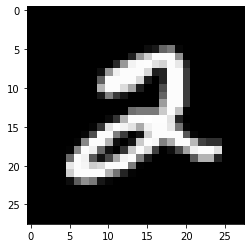

In [7]:
# Let us import and how the data looks like
plt.imshow(x_train[5],cmap='gray');


In [8]:
# Checking the shape of the dataset
print('x_train Shape: ',x_train.shape)
print('x_test Shape: ',x_test.shape)
print('y_train Shape: ',y_train.shape)
print('y_test Shape: ',y_test.shape)

x_train Shape:  (60000, 28, 28)
x_test Shape:  (10000, 28, 28)
y_train Shape:  (60000,)
y_test Shape:  (10000,)


In [9]:
# Scaling the data from 0 to 255 to 0 to 1
x_train=x_train/255.0
x_test=x_test/255.0

In [18]:
# Building the model
i=Input(shape=(28,28))
x=Flatten()(i)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(10,activation='softmax')(x)

model=Model(i,x)

model.summary()


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)              

In [20]:
# Compiling the model and fitting the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0830 - accuracy: 0.9762 - val_loss: 0.0784 - val_accuracy: 0.9787
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0701 - accuracy: 0.9781 - val_loss: 0.0894 - val_accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0712 - accuracy: 0.9784 - val_loss: 0.0785 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0651 - accuracy: 0.9803 - val_loss: 0.0764 - val_accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0617 - accuracy: 0.9807 - val_loss: 0.0760 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0610 - accuracy: 0.9814 - val_loss: 0.0816 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0590 - accuracy: 0.9825 - val_loss: 0.0691 - val_accuracy:

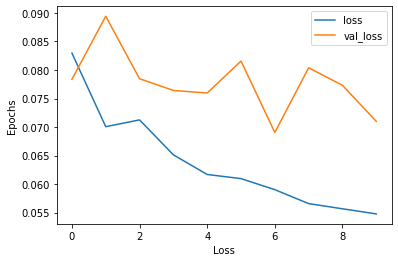

In [22]:
# Plotting the losses and the accuracy
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

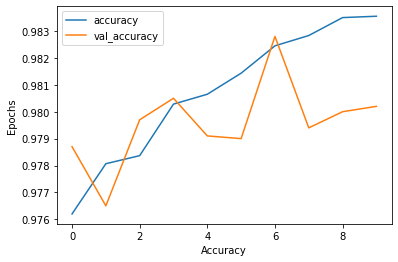

In [23]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [27]:
# Predicting the dataset
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

In [31]:
# Calculating Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

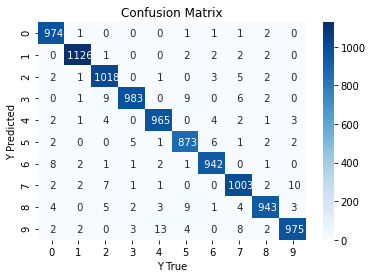

In [35]:
ax=sns.heatmap(cm,annot=True,fmt=' ',cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Y True')
ax.set_ylabel('Y Predicted');


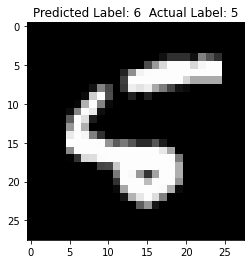

In [40]:
# Checking some where the model identified wrong
missclassified_idx=np.where(y_pred!=y_test)[0]
i=np.random.choice(missclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('Predicted Label: %s  Actual Label: %s' %(y_pred[i],y_test[i]))
plt.show()